In [308]:
!pip install xlrd==1.2.0
!pip install openpyxl
#!pip install --upgrade tensorflow
#!pip install --upgrade tensorflow-gpu
!pip install xlrd==1.2.0
!pip install openpyxl
!pip install bltk
!pip install nltk

!pip install bnlp_toolkit
import bltk
import numpy as np
import pandas as pd
import re
import _pickle as cPickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from nltk.corpus import stopwords
import nltk
from pandas import read_excel
from nltk.stem import WordNetLemmatizer
import string
from textblob import Word, TextBlob
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [309]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [310]:
df_train= pd.read_csv('/content/drive/MyDrive/ start/ 5040reviews.csv', encoding='UTF-8' )
df_train

,Text,Label
0,"পুরাই অস্থির!!! ""সাকিল, চট্টগ্রাম",1
1,নাজিফা তুষি আপু অবিনয় টা বেস্ট ছিল ওনার জন্য ক...,1
2,পুরাই আগুন অনেক দিনের অপেক্ষায় আছি এই কাজ টা দ...,1
3,"ইন্টারেস্টিং স্টোরি,অভিনয়, সিনেমেটোগ্রাফিও জোস",1
4,এট লিস্ট অনন্ত জলীল এর ১০০ কোটি টাকার মুভির ট্...,1
...,...,...
5034,মুভিটা সত্যি অনেক রহস্যময়.. দেখে অনেক মজা পাইছি।,1
5035,দারুণভাবে উপভোগ করলাম। খুব রোমহষর্ক ও চিত্তাক...,1
5036,"কি সুন্দর গ্রাফিক্স,বাঘ হাঁটছে,কিন্তু পাতা নড়...",2
5037,ভালো লাগছে। বর্তমান যুগের প্রতিচ্ছবি।,1


In [311]:
print("Total Reviews:",len(df_train),
      "\nTotal Positive Reviews:",len(df_train[df_train.Label ==1]),
      "\nTotal Negative Reviews:",len(df_train[df_train.Label==2]),
      "\nTotal Neutral Reviews:",len(df_train[df_train.Label ==0]))


Total Reviews: 5039 
Total Positive Reviews: 3143 
Total Negative Reviews: 1532 
Total Neutral Reviews: 364


In [312]:
df_train.drop_duplicates(inplace=True)
df_train.shape

(4769, 2)

In [313]:
print("Total Reviews:",len(df_train),
      "\nTotal Positive Reviews:",len(df_train[df_train.Label ==1]),
      "\nTotal Negative Reviews:",len(df_train[df_train.Label==2]),
      "\nTotal Neutral Reviews:",len(df_train[df_train.Label ==0]))


Total Reviews: 4769 
Total Positive Reviews: 2911 
Total Negative Reviews: 1500 
Total Neutral Reviews: 358


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



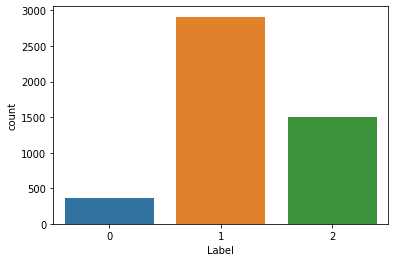

In [314]:
sns.countplot(df_train['Label']);

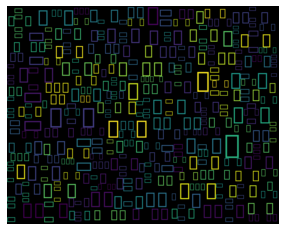

In [315]:
from wordcloud import WordCloud 
# Plot the Word Cloud
allWords = ' '.join([comnt for comnt in df_train['Text']])
wordCloud = WordCloud(width =1000, height =800, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

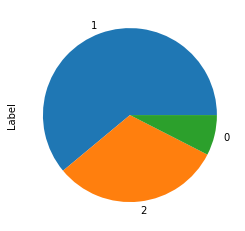

In [316]:

df_train['Label'].value_counts().plot(kind='pie')
plt.show()

Preprocessing/Cleaning

In [317]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations
                               
                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)
    
    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''
    
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [318]:
df_train['Text'] = df_train.Text.apply(lambda x: preprocessing(str(x)))

In [319]:
df_train

,Text,Label
0,পুরাই অস্থির সাকিল চট্টগ্রাম,1
1,নাজিফা তুষি আপু অবিনয় টা বেস্ট ছিল ওনার জন্য ক...,1
2,পুরাই আগুন অনেক দিনের অপেক্ষায় আছি এই কাজ টা দ...,1
3,ইন্টারেস্টিং স্টোরিঅভিনয় সিনেমেটোগ্রাফিও জোস,1
4,এট লিস্ট অনন্ত জলীল এর কোটি টাকার মুভির ট্রেই...,1
...,...,...
5033,বাইষচঙদ মার্কা স্ক্রিপ্ট,2
5034,মুভিটা সত্যি অনেক রহস্যময় দেখে অনেক মজা পাইছি,1
5035,দারুণভাবে উপভোগ করলাম খুব রোমহষর্ক ও চিত্তাকর্ষক,1
5037,ভালো লাগছে বর্তমান যুগের প্রতিচ্ছবি,1


In [320]:
from bnlp import BasicTokenizer
btokenizer = BasicTokenizer()
def clean_text(Text):
    
    tokens = btokenizer.tokenize(Text)

Stopwords Removal

In [321]:
data1 =pd.read_excel('/content/drive/MyDrive/ start/stopwords_bangla.xlsx')
stop = data1['words'].tolist()

In [322]:
data1

,Unnamed: 0,words
0,0,অই
1,1,অগত্যা
2,2,অত: পর
3,3,অতএব
4,4,অথচ
...,...,...
727,727,হয়েই
728,728,হয়েছিল
729,729,হয়েছে
730,730,হয়েছেন


In [323]:
def stopwordRemoval(text):    
    x=str(text)
    l=x.split()

    stm=[elem for elem in l if elem not in stop]
    
    out=' '.join(stm)
    
    return str(out)

In [324]:
df_train['Text'] = df_train.Text.apply(lambda x: stopwordRemoval(str(x)))
df_train

,Text,Label
0,পুরাই অস্থির সাকিল চট্টগ্রাম,1
1,নাজিফা তুষি আপু অবিনয় বেস্ট ওনার কান্না আসছে,1
2,পুরাই আগুন দিনের অপেক্ষায় আছি দেখার,1
3,ইন্টারেস্টিং স্টোরিঅভিনয় সিনেমেটোগ্রাফিও জোস,1
4,এট লিস্ট অনন্ত জলীল টাকার মুভির ট্রেইলার হাজার...,1
...,...,...
5033,বাইষচঙদ মার্কা স্ক্রিপ্ট,2
5034,মুভিটা সত্যি রহস্যময় মজা পাইছি,1
5035,দারুণভাবে উপভোগ করলাম রোমহষর্ক চিত্তাকর্ষক,1
5037,ভালো লাগছে যুগের প্রতিচ্ছবি,1


Stemming

In [325]:
#make sure to turn on internet on your kernel
#importing stemmer
!pip install bangla-stemmer
from bangla_stemmer.stemmer import stemmer
## stemmer function
def stem_text (x):
  stmr = stemmer.BanglaStemmer()
  words=x.split(' ')
  stm = stmr.stem(words)
  words=(' ').join(stm)
  return words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [326]:
df_train['Text']=df_train['Text'].apply(stem_text)
df_train

Streaming output truncated to the last 5000 lines.
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rul

,Text,Label
0,পুরা অস্থির সাকিল চট্টগ্রাম,1
1,নাজিফা তুষি আপু অবিনয় বেস্ট ওন কান্না আস,1
2,পুরা আগুন দিন অপেক্ষায় আছি দেখ,1
3,ইন্টারেস্টিং স্টোরিঅভিনয় সিনেমেটোগ্রাফি জোস,1
4,এট লিস্ট অনন্ত জলীল টাকা মুভির ট্রেইল হাজারগুন...,1
...,...,...
5033,বাইষচঙদ মার্কা স্ক্রিপ্ট,2
5034,মুভি সত্যি রহস্যময় মজা পাই,1
5035,দারুণভাবে উপভোগ কর রোমহষর্ক চিত্তাকর্ষক,1
5037,ভালো লাগ যুগ প্রতিচ্ছবি,1


In [327]:
df_train['length'] = df_train['Text'].apply(lambda x:len(x.split()))

# Remove the reviews with least words
dataset = df_train.loc[df_train.length>2]
dataset = df_train.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Reviews".format(len(df_train)-len(dataset)),
      "\nTotal Reviews:",len(dataset))

After Cleaning: 
Removed 0 Small Reviews 
Total Reviews: 4769


Category Wise Data Distribution

In [328]:
print("IN TRAIN SET...")
temp1 = df_train.groupby('Label').count()['Text'].reset_index().sort_values(by='Text',ascending=False)
temp1.style.background_gradient(cmap='Purples')

IN TRAIN SET...


,Label,Text
1,1,2911
2,2,1500
0,0,358


Count of Texts in Each Category

In [329]:
from plotly import graph_objs as go
print("On Train Set....")
fig = go.Figure(go.Funnelarea(
    text =temp1.Label,
    values = temp1.Text,
    title = {"position": "top center", "text": "Funnel-Chart of Category Distribution on Train Set"}
    ))
fig.show()

On Train Set....


In [330]:
#Dataset Summary

def data_summary(df_train):
    
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip() for t in list(df_train.Text) for word in t.strip().split()]
    class_label= [k for k,v in df_train.Label.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip() for t in list(df_train[df_train.Label==label].Text) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
                
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        
        # Documents per class
        documents.append(len(list(df_train[df_train.Label==label].Text)))
        
        # Total Word per class
        words.append(len(word_list))
        
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(df_train[df_train.Label==label].Text))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
                
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label


documents,words,u_words,class_names = data_summary(df_train)   


Class Name :  1
Number of Documents:2911
Number of Words:19078
Number of Unique Words:4691
Most Frequent Words:

ভালো	546
গান	518
অসাধারণ	434
সুন্দর	307
এক	272
অভিনয়	260
না	256
সিরিজ	205
মুভি	153
দেখ	147

Class Name :  2
Number of Documents:1500
Number of Words:11609
Number of Unique Words:4376
Most Frequent Words:

না	337
ভালো	172
এক	124
অভিনয়	89
এসব	83
সমাজ	83
সিরিজ	75
সিনেমা	69
মুভি	61
নাটক	61

Class Name :  0
Number of Documents:358
Number of Words:2067
Number of Unique Words:1143
Most Frequent Words:

না	51
মুভি	24
ভালো	23
ভাই	21
এক	19
চাই	16
নাটক	13
থাকলে	12
যায়	11
দেখ	11
Total Number of Unique Words:8036


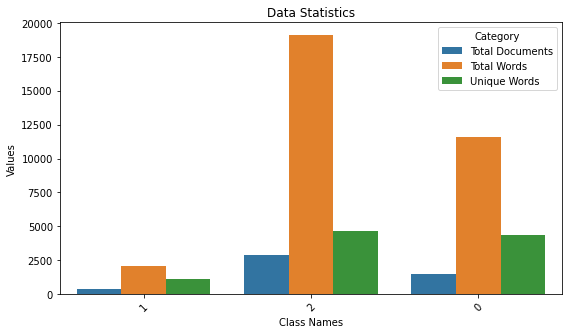

In [402]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(9,5))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

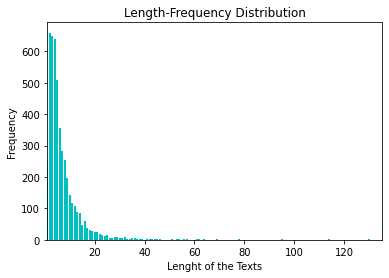

Maximum Length of a review: 130
Minimum Length of a review: 0
Average Length of a reviews: 7.0


In [400]:
# Calculate the Review of each of the Review
df_train['ReviewLength'] = df_train.Text.apply(lambda x:len(x.split()))
frequency = dict()
for i in df_train.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="c")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a review: {max(df_train.ReviewLength)}")
print(f"Minimum Length of a review: {min(df_train.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(df_train.ReviewLength),0)}")

In [333]:
pcomment = df_train[df_train.Label == 1][:2911]
pcomment


,Text,Label,length,ReviewLength
0,পুরা অস্থির সাকিল চট্টগ্রাম,1,4,4
1,নাজিফা তুষি আপু অবিনয় বেস্ট ওন কান্না আস,1,8,8
2,পুরা আগুন দিন অপেক্ষায় আছি দেখ,1,6,6
3,ইন্টারেস্টিং স্টোরিঅভিনয় সিনেমেটোগ্রাফি জোস,1,4,4
4,এট লিস্ট অনন্ত জলীল টাকা মুভির ট্রেইল হাজারগুন...,1,11,11
...,...,...,...,...
5029,সিরিজ সুন্দর হয়,1,3,3
5030,দেখ ভালো লাগলো কোরে কোর্ট সয়াল দৃশ্য অভিনয় ভাল...,1,12,12
5034,মুভি সত্যি রহস্যময় মজা পাই,1,5,5
5035,দারুণভাবে উপভোগ কর রোমহষর্ক চিত্তাকর্ষক,1,5,5


In [334]:
ncomment = df_train[df_train.Label == 2]
ncomment


,Text,Label,length,ReviewLength
33,টাক কপিপেস্ট চালায় ক্রেডিট না,2,5,5
37,জাহান্নামী,2,1,1
41,ধীরগতির মজা পাই না সময় নষ্ট হই,2,7,7
50,বাংলা সিনেম কথা লাভ,2,4,4
57,চাল একুরিয়ামে মাছ আপাতত মাছ সিয়াম রান্না দাও,2,8,8
...,...,...,...,...
5028,ওটিটিতে এফডিসি স্টাইলে ডায়লগ ডেলিভারি বিজরীর স...,2,10,10
5031,সিরিজ গুলো কুরুচিপূর্ণ সমাজ নস্ট প্রত্যক্ষ দায়...,2,11,11
5032,গাঁজাখোর বোকাদা একজন কথা পড়,2,5,5
5033,বাইষচঙদ মার্কা স্ক্রিপ্ট,2,3,3


In [335]:
nuecomment = df_train[df_train.Label == 0]
nuecomment


,Text,Label,length,ReviewLength
10,আগুন লাগা দিলো ঝলকে,0,4,4
12,নিশো ভাই মানে আগুন,0,4,4
15,বাংলাদেশ কিছুর আশা,0,3,3
16,আগ যুগ মান্না এখনক যুগ নিশো,0,6,6
22,বস মানে আগুন,0,3,3
...,...,...,...,...
4647,কন্ট কোয়ালিটি রাখ পারবে,0,4,4
4663,অনিরুদ্ধ ওয়েব সিরিজ বিজিএম তৈরি,0,5,5
4870,বাংলা ফোক,0,2,2
4944,রুপ কথ জগ এসেছো আম,0,5,5


In [336]:
df_train = pd.concat([pcomment,ncomment,nuecomment], axis = 0)


In [337]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf1 = TfidfVectorizer(ngram_range=(1,1),use_idf=True,tokenizer=lambda x: x.split()) 
X = tfidf1.fit_transform(df_train['Text'])
y=df_train['Label'].values
print("Shape of TF-IDF:",X.shape,'\n')


Shape of TF-IDF: (4769, 8036) 



In [338]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot

In [339]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [340]:
X.shape

(8733, 8036)

In [341]:
y

array([1, 1, 1, ..., 2, 2, 2])

Class=1, n=2911 (33.333%)
Class=2, n=2911 (33.333%)
Class=0, n=2911 (33.333%)


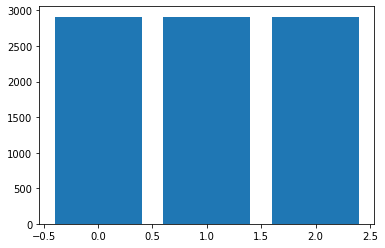

In [342]:
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [343]:
review='পুরাই অস্থির সাকিল চট্টগ্রাম	'
print("Sample Review: ",review)
vector = tfidf1.transform([review])
df = pd.DataFrame(vector.T.todense(), index=tfidf1.get_feature_names(), columns=["tfidf"])
a = df.sort_values(by=["tfidf"],ascending=False)
print(a[0:len(review.split())])

Sample Review:  পুরাই অস্থির সাকিল চট্টগ্রাম	
              tfidf
চট্টগ্রাম  0.612332
সাকিল      0.598129
অস্থির     0.517002
¿          0.000000


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [344]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size = 0.8, test_size = 0.2,random_state =100)
print('Shape of X_train:', xtrain.shape)
print('Shape of X_test:', xtest.shape)
print('Shape of Y_train:', ytrain.shape)
print('Shape of Y_test:', ytest.shape)

Shape of X_train: (6986, 8036)
Shape of X_test: (1747, 8036)
Shape of Y_train: (6986,)
Shape of Y_test: (1747,)


In [345]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [346]:
lr=LogisticRegression()
lr.fit(xtrain, ytrain)
prediction = lr.predict(xtest)
pred_prob1 = lr.predict_proba(xtest)
print("Accuracy: {0:.2%}".format(accuracy_score(prediction, ytest)))

Accuracy: 84.54%


In [347]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(ytest, prediction))


Classification Report

              precision    recall  f1-score   support

           0       0.76      0.96      0.85       574
           1       0.88      0.74      0.80       561
           2       0.93      0.83      0.88       612

    accuracy                           0.85      1747
   macro avg       0.86      0.84      0.84      1747
weighted avg       0.86      0.85      0.84      1747



In [348]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

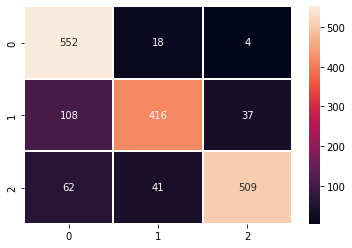

In [349]:
conf_m = confusion_matrix(ytest, prediction)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

In [350]:
comment=['আবু সাঈদ রানা খুব ভালো কাজ হয়েছে দোস্ত।','কাহিনীর গল্প খুব বাজে','এই সিরিজ টা পুরো কোথায় পাওয়া যাবে']
tf_comment = tfidf1.transform(comment)
lr.predict(tf_comment)


array([1, 2, 2])

In [351]:
mn= MultinomialNB()
mn.fit(xtrain, ytrain)
prediction = mn.predict(xtest)
pred_prob1 = mn.predict_proba(xtest)
print("Accuracy: {0:.2%}".format(accuracy_score(prediction, ytest)))

Accuracy: 85.80%


In [352]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(ytest, prediction))


Classification Report

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       574
           1       0.82      0.84      0.83       561
           2       0.91      0.85      0.88       612

    accuracy                           0.86      1747
   macro avg       0.86      0.86      0.86      1747
weighted avg       0.86      0.86      0.86      1747



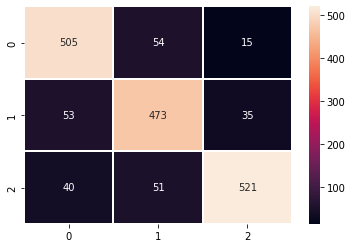

In [353]:
conf_m = confusion_matrix(ytest, prediction)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

In [354]:
comment=['আবু সাঈদ রানা খুব ভালো কাজ হয়েছে দোস্ত।','কাহিনীর গল্প খুব বাজে','এই সিরিজ টা পুরো কোথায় পাওয়া যাবে']
tf_comment = tfidf1.transform(comment)
mn.predict(tf_comment)


array([1, 2, 0])

In [355]:
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.multiclass import OneVsRestClassifier

In [356]:
fpr = {}
tpr = {}
thresh ={}
n_class = 3

In [357]:
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(ytest, pred_prob1[:,i], pos_label=i)

In [358]:
pred_prob0 = lr.predict_proba(xtest)[:,1]
fpr0 , tpr0, thresholds0 =metrics.roc_curve(ytest, pred_prob0,pos_label=1)

In [359]:
pred_prob1 = mn.predict_proba(xtest)[:,1]

In [360]:
fpr1 , tpr1, thresholds1 =metrics.roc_curve(ytest, pred_prob1,pos_label=1)

In [361]:
knn= KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
knn.fit(xtrain, ytrain)
prediction = knn.predict(xtest)
pred_prob2 = knn.predict_proba(xtest)
print("Accuracy: {0:.2%}".format(accuracy_score(prediction, ytest)))

Accuracy: 58.61%


In [362]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(ytest, prediction))


Classification Report

              precision    recall  f1-score   support

           0       0.45      1.00      0.62       574
           1       0.95      0.21      0.34       561
           2       0.96      0.55      0.70       612

    accuracy                           0.59      1747
   macro avg       0.79      0.58      0.55      1747
weighted avg       0.79      0.59      0.56      1747



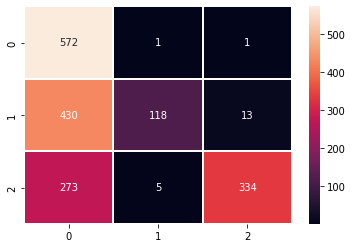

In [363]:
conf_m = confusion_matrix(ytest, prediction)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

In [364]:
comment=['আবু সাঈদ রানা খুব ভালো কাজ হয়েছে দোস্ত।','কাহিনীর গল্প খুব বাজে','এই সিরিজ টা পুরো কোথায় পাওয়া যাবে']
tf_comment = tfidf1.transform(comment)
knn.predict(tf_comment)

array([0, 2, 0])

In [365]:
pred_prob2 = knn.predict_proba(xtest)[:,1]
fpr2 , tpr2, thresholds2 =metrics.roc_curve(ytest, pred_prob2,pos_label=1)

In [366]:
lsvm= SVC(kernel="linear", probability=True)
lsvm.fit(xtrain, ytrain)
prediction = lsvm.predict(xtest)
pred_prob3 = lsvm.predict_proba(xtest)
print("Accuracy: {0:.2%}".format(accuracy_score(prediction, ytest)))

Accuracy: 84.66%


In [367]:
print('\nClassification Report\n')
print(classification_report(ytest, prediction))


Classification Report

              precision    recall  f1-score   support

           0       0.75      0.98      0.85       574
           1       0.89      0.74      0.81       561
           2       0.95      0.83      0.88       612

    accuracy                           0.85      1747
   macro avg       0.86      0.85      0.85      1747
weighted avg       0.86      0.85      0.85      1747



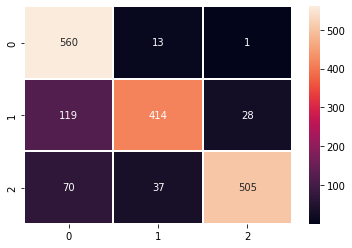

In [368]:
conf_m = confusion_matrix(ytest, prediction)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

In [369]:
comment=['আবু সাঈদ রানা খুব ভালো কাজ হয়েছে দোস্ত।','কাহিনীর গল্প খুব বাজে','এই সিরিজ টা পুরো কোথায় পাওয়া যাবে']
tf_comment = tfidf1.transform(comment)
lsvm.predict(tf_comment)


array([1, 2, 2])

In [370]:
pred_prob3 = mn.predict_proba(xtest)[:,1]
fpr3 , tpr3, thresholds3 =metrics.roc_curve(ytest, pred_prob3,pos_label=1)

In [371]:
ksvm= SVC(kernel = 'rbf',probability=True)
ksvm.fit(xtrain, ytrain)
prediction = ksvm.predict(xtest)
pred_prob4 = ksvm.predict_proba(xtest)
print("Accuracy: {0:.2%}".format(accuracy_score(prediction, ytest)))

Accuracy: 92.16%


In [372]:
print('\nClassification Report\n')
print(classification_report(ytest, prediction))


Classification Report

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       574
           1       0.83      0.95      0.89       561
           2       0.96      0.87      0.91       612

    accuracy                           0.92      1747
   macro avg       0.93      0.92      0.92      1747
weighted avg       0.93      0.92      0.92      1747



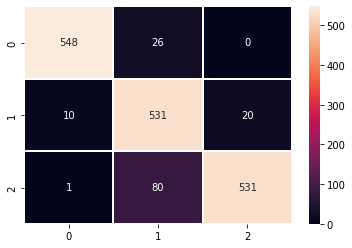

In [373]:
conf_m = confusion_matrix(ytest, prediction)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

In [374]:
comment=['আবু সাঈদ রানা খুব ভালো কাজ হয়েছে দোস্ত।','কাহিনীর গল্প খুব বাজে','এই সিরিজ টা পুরো কোথায় পাওয়া যাবে']
tf_comment = tfidf1.transform(comment)
ksvm.predict(tf_comment)


array([1, 2, 1])

In [375]:
pred_prob4 = ksvm.predict_proba(xtest)[:,1]
fpr4 , tpr4, thresholds4 =metrics.roc_curve(ytest, pred_prob4,pos_label=1)

In [376]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
prediction = dt.predict(xtest)
pred_prob5 = dt.predict_proba(xtest)
print("Accuracy: {0:.2%}".format(accuracy_score(prediction, ytest)))

Accuracy: 80.02%


In [377]:
print('\nClassification Report\n')
print(classification_report(ytest, prediction))


Classification Report

              precision    recall  f1-score   support

           0       0.76      0.92      0.84       574
           1       0.81      0.73      0.77       561
           2       0.84      0.75      0.79       612

    accuracy                           0.80      1747
   macro avg       0.80      0.80      0.80      1747
weighted avg       0.80      0.80      0.80      1747



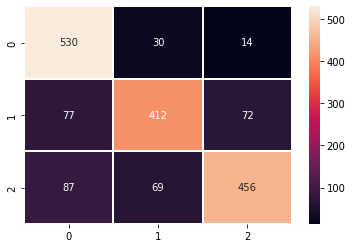

In [378]:
conf_m = confusion_matrix(ytest, prediction)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

In [379]:
comment=['আবু সাঈদ রানা খুব ভালো কাজ হয়েছে দোস্ত।','কাহিনীর গল্প খুব বাজে','এই সিরিজ টা পুরো কোথায় পাওয়া যাবে']
tf_comment = tfidf1.transform(comment)
dt.predict(tf_comment)


array([1, 2, 0])

In [380]:
pred_prob5 = dt.predict_proba(xtest)[:,1]
fpr5 , tpr5, thresholds5 =metrics.roc_curve(ytest, pred_prob5,pos_label=1)

In [381]:
rf = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
rf.fit(xtrain, ytrain)
prediction = rf.predict(xtest)
pred_prob6 = rf.predict_proba(xtest)
print("Accuracy: {0:.2%}".format(accuracy_score(prediction, ytest)))


Accuracy: 86.15%


In [382]:
print('\nClassification Report\n')
print(classification_report(ytest, prediction))


Classification Report

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       574
           1       0.90      0.80      0.84       561
           2       0.92      0.81      0.86       612

    accuracy                           0.86      1747
   macro avg       0.87      0.86      0.86      1747
weighted avg       0.87      0.86      0.86      1747



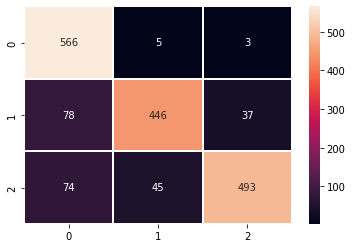

In [383]:
conf_m = confusion_matrix(ytest, prediction)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

In [384]:
comment=['আবু সাঈদ রানা খুব ভালো কাজ হয়েছে দোস্ত।','কাহিনীর গল্প খুব বাজে','এই সিরিজ টা পুরো কোথায় পাওয়া যাবে']
tf_comment = tfidf1.transform(comment)
rf.predict(tf_comment)


array([1, 2, 0])

In [385]:
pred_prob6 = rf.predict_proba(xtest)[:,1]
fpr6 , tpr6, thresholds6 =metrics.roc_curve(ytest, pred_prob6,pos_label=1)

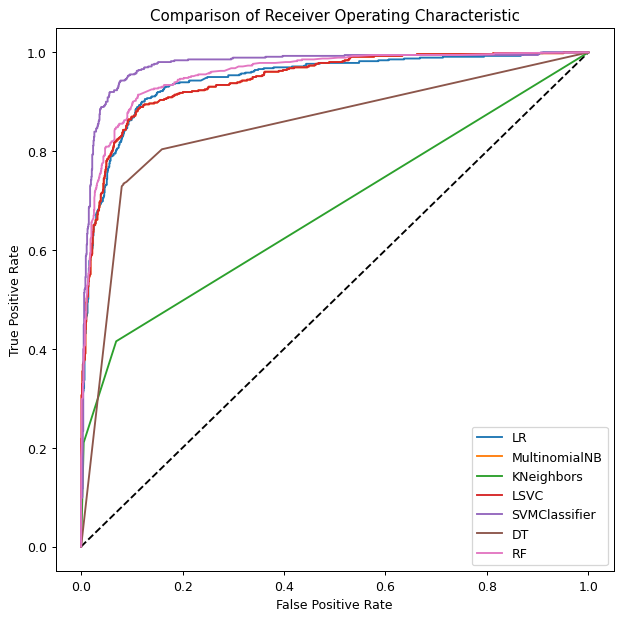

In [386]:
plt.figure(figsize=(8, 8), dpi=90)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr0, tpr0, label= "LR" )
plt.plot(fpr1, tpr1, label= "MultinomialNB" )
plt.plot(fpr2, tpr2, label= "KNeighbors" )
plt.plot(fpr3, tpr3, label= "LSVC" )
plt.plot(fpr4, tpr4, label= "SVMClassifier")
plt.plot(fpr5, tpr5, label= "DT")
plt.plot(fpr6, tpr6, label= "RF")


plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Comparison of Receiver Operating Characteristic')
plt.show()

In [387]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense , Dropout , Activation
from keras.layers import LSTM , Embedding
from keras.layers import MaxPooling1D , GlobalMaxPooling1D,Conv1D , Flatten
from keras.datasets import imdb
from keras.preprocessing import text

In [388]:
xtest.shape

(1747, 8036)

In [389]:
xtest = xtest.reshape(-1,10031)
xtrain = xtrain.reshape(-1,10031)

ValueError: ignored

In [ ]:
ann = Sequential()

In [ ]:
ann.add(Dense(units=64,activation='relu',input_dim=10031))
ann.add(Dense(units=64,activation='relu'))
ann.add(Dense(units=1,activation='softmax'))
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
ann.summary()

In [ ]:
ann.fit(xtrain , ytrain , validation_data= (xtest , ytest) ,batch_size = 100, epochs = 100 , verbose = 1)

**Train-Test Spliting**

In [ ]:
#x= df_train.Text.values[:4769]
#y= df_train.Label.values[:4769]
from sklearn.model_selection import train_test_split
X = df_train.Text
y = df_train.Label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a Vectorizer Object
vectorizer = CountVectorizer()
 
vectorizer.fit(X)
 
# Printing the identified Unique words along with their indices
# print("Vocabulary: ", vectorizer.vocabulary_)
 
# Encode the Document
vector = vectorizer.transform(X)
 
# Summarizing the Encoded Texts
# print("Encoded Document is:")
print(vector.toarray())

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
import collections
x_resampled, y_resampled = SMOTE().fit_resample(vector,y)
print(sorted(collections.Counter(y_resampled).items()))


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vector, y, test_size=0.2, shuffle=True, random_state=100)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

In [ ]:
model.score( X_test,y_test)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

**Applying Logestic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

lr = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression()),
              ])

lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)

print("Accuracy: {0:.2%}".format(accuracy_score(y_pred1,y_test)))

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test,y_pred1))

**Applying DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier


decisiontreeclassifier = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', DecisionTreeClassifier()),
              ])
decisiontreeclassifier.fit(X_train, y_train)

y_pred = decisiontreeclassifier.predict(X_test)

print("Accuracy: {0:.2%}".format(accuracy_score(y_pred,y_test)))


In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test,y_pred))

**Applying RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomforestclassifier = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', RandomForestClassifier()),
              ])
randomforestclassifier.fit(X_train, y_train)

y_pred = randomforestclassifier.predict(X_test)

print("Accuracy: {0:.2%}".format(accuracy_score(y_pred,y_test)))

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test,y_pred))

**Applying MultinomialNB**

In [ ]:
from sklearn.naive_bayes import MultinomialNB


naivebayes = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
naivebayes.fit(X_train, y_train)

y_pred = naivebayes.predict(X_test)

print("Accuracy: {0:.2%}".format(accuracy_score(y_pred,y_test)))


In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test,y_pred))

**Applying KNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNeighborsClassifier = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', KNeighborsClassifier()),
              ])
KNeighborsClassifier.fit(X_train, y_train)

y_pred = KNeighborsClassifier.predict(X_test)

print("Accuracy: {0:.2%}".format(accuracy_score(y_pred,y_test)))

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test,y_pred))

**Applying SVC**

In [ ]:
from sklearn.svm import SVC

SVC = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', SVC()),
              ])
SVC.fit(X_train, y_train)

y_pred = SVC.predict(X_test)

print("Accuracy: {0:.2%}".format(accuracy_score(y_pred,y_test)))

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test,y_pred))

**Applying SGDClassifier**

In [ ]:
from sklearn.linear_model import SGDClassifier

SGDClassifier = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', SGDClassifier()),
              ])
SGDClassifier.fit(X_train, y_train)

y_pred = SGDClassifier.predict(X_test)

print("Accuracy: {0:.2%}".format(accuracy_score(y_pred,y_test)))

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test,y_pred))

**Applying XGBClassifier**

In [ ]:
from xgboost import XGBClassifier

xgboost = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', XGBClassifier()),
              ])
xgboost.fit(X_train, y_train)

y_pred = xgboost.predict(X_test)

print("Accuracy: {0:.2%}".format(accuracy_score(y_pred,y_test)))


In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test,y_pred))

**split and build model another way..**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a Vectorizer Object
vectorizer = CountVectorizer()
 
vectorizer.fit(x)
 
# Printing the identified Unique words along with their indices
# print("Vocabulary: ", vectorizer.vocabulary_)
 
# Encode the Document
vector = vectorizer.transform(x)
 
# Summarizing the Encoded Texts
# print("Encoded Document is:")
print(vector.toarray())

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vector, y, test_size=0.2, shuffle=True, random_state=100)

In [ ]:
# X_train_counts.toarray()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
model.score( X_test,y_test)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

In [ ]:
model.score( X_test,y_test)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

In [ ]:
model.score( X_test,y_test)

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

In [ ]:
model.score( X_test,y_test)

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

In [ ]:
model.score( X_test,y_test)

In [ ]:
model =SVC()
model.fit(X_train, y_train)

In [ ]:
model.score( X_test,y_test)

In [ ]:
model =SGDClassifier()
model.fit(X_train, y_train)

In [ ]:
model.score( X_test,y_test)